<a href="https://colab.research.google.com/github/MarkystarkDotCO/CreditCard_Fraud_Analysis_UCI/blob/main/FraudAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract Zip

In [2]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/fraud_dataset/default+of+credit+card+clients.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/content")


Read xls as dataframe

In [29]:
import pandas as pd

df = pd.read_excel('/content/default of credit card clients.xls')

df = df.drop(0)
print(df.head())

  Unnamed: 0      X1 X2 X3 X4  X5  X6 X7  X8  X9  ...    X15    X16    X17  \
1          1   20000  2  2  1  24   2  2  -1  -1  ...      0      0      0   
2          2  120000  2  2  2  26  -1  2   0   0  ...   3272   3455   3261   
3          3   90000  2  2  2  34   0  0   0   0  ...  14331  14948  15549   
4          4   50000  2  2  1  37   0  0   0   0  ...  28314  28959  29547   
5          5   50000  1  2  1  57  -1  0  -1   0  ...  20940  19146  19131   

    X18    X19    X20   X21   X22   X23  Y  
1     0    689      0     0     0     0  1  
2     0   1000   1000  1000     0  2000  1  
3  1518   1500   1000  1000  1000  5000  0  
4  2000   2019   1200  1100  1069  1000  0  
5  2000  36681  10000  9000   689   679  0  

[5 rows x 25 columns]


In [30]:
df.isnull()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
"""count_nan = df['first_set'].isna().sum()
"""
columns = df.columns.values.tolist()
for i in columns:
  count_nan = df[i].isna().sum()
  print(i, "", "NAN = ", count_nan)

Unnamed: 0  NAN =  0
X1  NAN =  0
X2  NAN =  0
X3  NAN =  0
X4  NAN =  0
X5  NAN =  0
X6  NAN =  0
X7  NAN =  0
X8  NAN =  0
X9  NAN =  0
X10  NAN =  0
X11  NAN =  0
X12  NAN =  0
X13  NAN =  0
X14  NAN =  0
X15  NAN =  0
X16  NAN =  0
X17  NAN =  0
X18  NAN =  0
X19  NAN =  0
X20  NAN =  0
X21  NAN =  0
X22  NAN =  0
X23  NAN =  0
Y  NAN =  0


In [71]:
df.std()


Unnamed: 0      8660.398374
X1            129747.661567
X2                 0.489129
X3                 0.790349
X4                 0.521970
X5                 9.217904
X6                 1.123802
X7                 1.197186
X8                 1.196868
X9                 1.169139
X10                1.133187
X11                1.149988
X12            73635.860576
X13            71173.768783
X14            69349.387427
X15            64332.856134
X16            60797.155770
X17            59554.107537
X18            16563.280354
X19            23040.870402
X20            17606.961470
X21            15666.159744
X22            15278.305679
X23            17777.465775
Y                  0.415062
dtype: float64

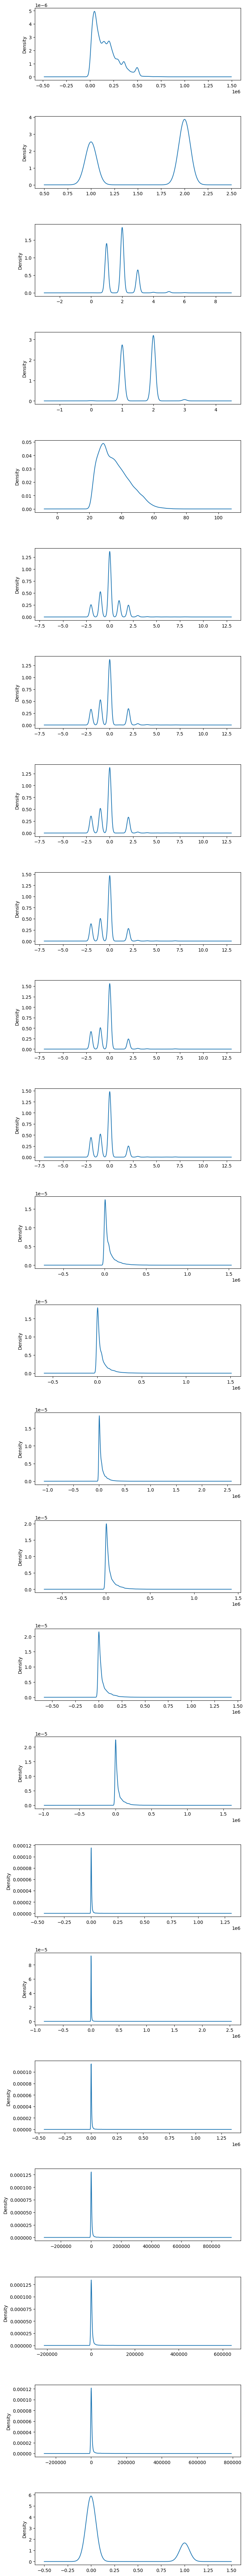

In [70]:
import matplotlib.pyplot as plt
"""fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,7))
df["X1"].plot(kind = 'kde')
df["X2"].plot(kind = 'kde')
df["X3"].plot(kind = 'kde')
"""


df.std()
# importing required libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# create a figure
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(100)

# set width of each subplot as 8
fig.set_figwidth(8)

# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=24,
						width_ratios=[2], wspace=0.5,
						hspace=0.5, height_ratios=[1]*24)

# initializing x,y axis value
x = np.arange(0, 10, 0.1)
y = np.cos(x)

# ax0 will take 0th position in
# geometry(Grid we created for subplots),
# as we defined the position as "spec[0]"

for i in range(24):
  if i == 23:
    fig.add_subplot(spec[23])
    df["Y"].plot(kind= 'kde')
    break

  fig.add_subplot(spec[i])
  df["X"+str(i+1)].plot(kind = 'kde')


# display the plots

plt.show()
